İlk ödev olarak hazırladığım Logistic Regression Kodum. Fazla benzer oldu. Bir dahaki ödevde daha fazlasını yapmaya çalışacağım. Tavsiyelerinizi bekliyorum.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
data = pd.read_csv("../input/heart.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
y = data.target.values
x_data = data.drop(['target'],axis = 1)
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [5]:
def initialize_prams(dimensions):
    w = np.full((dimensions,1),0.01)
    b = 0.0
    return w,b

In [6]:
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [7]:
def Forward_Backward_Propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    derivative_weights = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = (np.sum(y_head-y_train)/x_train.shape[1])
    gradients = {"derivative_weights":derivative_weights,"derivative_bias":derivative_bias}
    return cost, gradients

In [8]:
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list  = []
    cost_list2 = []
    index = []
    for i in range(number_of_iteration):
        cost,gradients = Forward_Backward_Propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w-learning_rate * gradients["derivative_weights"]
        b = b-learning_rate * gradients["derivative_bias"]
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("cost after iteration %i : %f"%(i,cost))
            
        parameters = {"weights":w,"bias":b}
        plt.plot(index,cost_list2)
        plt.xticks(index,rotation = "vertical")
        plt.show()
        return parameters,gradients,cost_list
    
    

In [9]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            y_prediction[0,1] = 0
        else:
            y_prediction[0,1] = 1
    return y_prediction

cost after iteration 0 : 0.692817


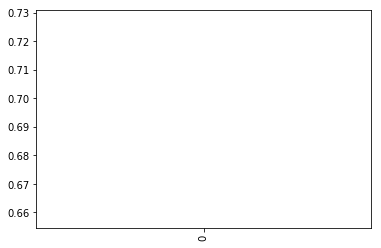

test accuracy : 43.956043956043956%
train accuracy : 46.22641509433962%


In [10]:
def logistic_regression(x_train,y_train,_test,y_test,learning_rate,number_of_iteration):
    
    dimensions = x_train.shape[0]
    w,b = initialize_prams(dimensions)
    parameters,gradients,cost_list = update(w,b,x_train,y_train,learning_rate,number_of_iteration)
    y_prediction_test = predict(parameters["weights"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weights"],parameters["bias"],x_train)
    
    print("test accuracy : {}%".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))
    print("train accuracy : {}%".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 3, number_of_iteration = 250) 

In [11]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

test accuracy 0.7912087912087912


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
